In [1]:
# import statements + autoreload #

%load_ext autoreload
%autoreload 2

import infrastructure as inf
import stratMACD

# MACD Backtest Data #
tl;dr-- ETC found to have most robust returns over all tradeable coins, and Sharpe Ratios of different MACD configurations found comparable to buy-and-hold strategy, though with less volatility

Interesting to note that coins with larger market caps (BTC, ETH, ADA, etc.) generally perform poorly with MACD. This could be due to the lower proportion of retail:institutional investments in these coins, though this would have to be investigated further.

### Ranked Coins (Over Past Year)
##### note: will take a while to run

In [2]:
# (4, 18, 3) #
print(stratMACD.rankCoins(1440, 4, 18, 3, index=365, trade_fee=.001))

               final
SANDUSD   226.337396
ETCUSD    200.236469
KNCUSD    179.558238
STORJUSD  130.316141
OMGUSD    128.293082
...              ...
SUSHIUSD   31.451681
MLNUSD     28.902395
TBTCUSD    19.052756
KARUSD     -0.034063
DAIUSD     -0.085748

[88 rows x 1 columns]


In [3]:
# (12, 26, 9) #
print(stratMACD.rankCoins(1440, 12, 26, 9, index=365, trade_fee=.001))

                final
ETCUSD     259.833269
AXSUSD     238.838934
CHZUSD     185.893557
QTUMUSD    150.462829
BADGERUSD  150.458679
...               ...
LSKUSD      -0.119366
SCUSD       -0.119805
ZRXUSD      -0.122197
LRCUSD      -0.127497
SHIBUSD     -0.144537

[88 rows x 1 columns]


In [11]:
# (20, 40, 14) #
print(stratMACD.rankCoins(1440, 20, 40, 14, index=365, trade_fee=.001))

                final
ETCUSD     144.738372
ADAUSD     119.377410
QNTUSD     100.409287
GHSTUSD    100.398777
PAXGUSD     99.858943
...               ...
GNOUSD      -0.119213
AAVEUSD     -0.120112
WAVESUSD    -0.124563
BANDUSD     -0.135337
BADGERUSD   -0.152877

[88 rows x 1 columns]


### MACD Visualisations
##### (past year)

C:\Users\jonat\PycharmProjects\pythonProject\stratMACD.py:212: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


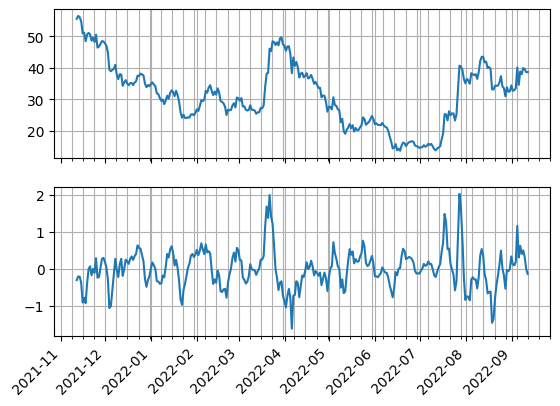

In [16]:
# (4, 18, 3) #
data1 = stratMACD.getMACDData('ETCUSD', 1440, 4, 18, 3)
stratMACD.plotMACD(data1.iloc[365:])

C:\Users\jonat\PycharmProjects\pythonProject\stratMACD.py:212: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


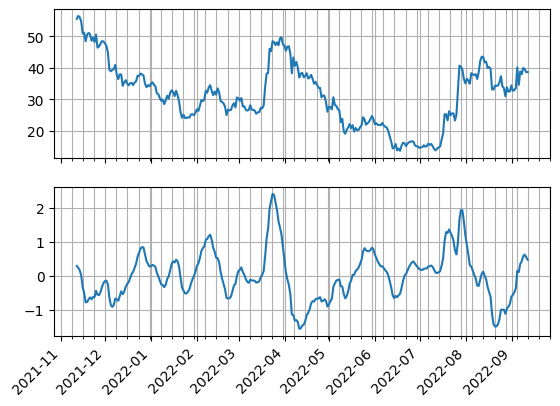

In [17]:
# (12, 26, 9) #
data2 = stratMACD.getMACDData('ETCUSD', 1440, 12, 26, 9)
stratMACD.plotMACD(data2.iloc[365:])

### Sharpe Ratios of MACD ETCUSD Strategies over past 670 Days
##### (aggregated monthly, then annualized)

In [8]:
# (4, 18, 3) #
results1 = stratMACD.backtestLongMACD(data1, trade_fee=.001)
print(inf.getSharpe(results1, '1M'))

# view monthly returns with code below
# print((results1['% change']+1).resample('1M').prod()-1)

           Mean       Vol   Sharpe
Strat  1.399893  1.317819  1.06228


In [9]:
# (12, 26, 9) #
results2 = stratMACD.backtestLongMACD(data2, trade_fee=.001)
print(inf.getSharpe(results2, '1M'))

# view monthly returns with code below
# print((results2['% change']+1).resample('1M').prod()-1)

           Mean       Vol    Sharpe
Strat  1.346046  1.312951  1.025206


In [6]:
# control: buy and hold #
control = inf.getHoldReturns('ETCUSD', 1440)
print(inf.getSharpe(control, '1M'))

# view monthly returns with code below
# print((control['% change']+1).resample('1M').prod()-1)

          Mean       Vol    Sharpe
Strat  1.99583  1.940282  1.028629
